In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.isri import ISRIStemmer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.preprocessing import LabelEncoder  
from stop_words import get_stop_words
from wordcloud import WordCloud 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('final_data', index_col=0)

In [4]:
data['judgment_text_1'] = data['judgment_text']

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 0 to 2394
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               1921 non-null   object 
 1   court            2245 non-null   object 
 2   city             2218 non-null   object 
 3   court_id         2245 non-null   object 
 4   court_date       2245 non-null   object 
 5   appeal_court     1446 non-null   object 
 6   region           1419 non-null   object 
 7   appeal_id        1446 non-null   object 
 8   appeal_date      1419 non-null   object 
 9   judgment_text    2245 non-null   object 
 10  appeal_text      1419 non-null   object 
 11  Unnamed: 0.1     324 non-null    float64
 12  links            324 non-null    object 
 13  appeal_data      27 non-null     object 
 14  appleal_text     27 non-null     object 
 15  judgment_text_1  2245 non-null   object 
 16  Verdict          2245 non-null   object 
 17  incident      

In [6]:
data.head(3)

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1
0,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٥٤٨٣,تاريخها: ٢٦/١١/١٤٤٣,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
1,مجموعة الأحكام القضائية,العامة,المدينه: بريدة,رقم القضية - القرار: ٣٣٢,تاريخها: ٢٦/١٠/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٥٥٢٨,تاريخه: ٢٤/١٠/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
2,مجموعة الأحكام القضائية,التجارية,المدينه: الدمام,رقم القضية - القرار: ٣٢٣٢,تاريخها: ٢٧/١١/١٤٤٢,محكمة الاستئناف: محكمة الاستئناف,المدينة: المنطقة الشرقية,رقم القرار: ٧٦,تاريخه: ٢٥/٧/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...


# EDA

# Data Cleaning


In [7]:
data['court'].value_counts()

التجارية    2176
العامة       179
العليا        39
Name: court, dtype: int64

In [8]:
# data['court'] =data['court'].str.replace('المحكمة: المحكمة التجارية', 'التجارية')
# data['court'] =data['court'].str.replace('المحكمة: المحكمة العليا -  الهيئة الدائمة', 'العليا')
# data['court'] =data['court'].str.replace('المحكمة: المحكمة العامة', 'العامة')
# data['court'] =data['court'].str.replace(' المحكمة التجارية', 'التجارية')

In [9]:
# data['court'] =data['court'].str.replace(' المحكمة العامة','العامة')

In [10]:
data['court'].value_counts()

التجارية    2176
العامة       179
العليا        39
Name: court, dtype: int64

In [11]:
data[data['judgment_text'].isnull()]

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1
59,مجموعة الأحكام القضائية,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
data['city'].isnull().sum()

27

In [146]:
data[data['city'].isnull()]

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1,Verdict,incident,court_y
2262,NaN,التجارية,NaN,١٧٧٤,٢٢/٨/١٤٤٢,المحكمة التجارية,NaN,٤٥٦٧,NaN,حمد التجاريه الثامنه وبناء المقامه جابر احمد ح...,NaN,218.0,القضية رقم ١٧٧٤ لعام ١٤٤٢ هـ,تاريخه: ٥/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره برفض الدعوي وبﷲ التوفيق رئيس الدائره ...,التجاريه الثامنه وبناءً المقامه جابر احمد حماد...,2
2267,NaN,التجارية,NaN,٦٦٠٧,٩/١/١٤٤٣,المحكمة التجارية,NaN,٧٩٠,NaN,حمد التجاريه الثامنه وبناء المقامه الشركه المت...,NaN,223.0,القضية رقم ٦٦٠٧ لعام ١٤٤٢ هـ,تاريخه: ٧/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره غيابيا بالزام خالد جمعه رضا حبش سجل م...,التجاريه الثامنه وبناءً المقامه الشركه المتحده...,2
2276,NaN,التجارية,NaN,٨٨٩٥,١/١/١٤٤٣,المحكمة التجارية,NaN,٦٥٤,NaN,حمد التجاريه الواحد والعشرون وبناء المقامه سعو...,NaN,232.0,القضية رقم ٨٨٩٥ لعام ١٤٤٢ هـ,تاريخه: ٦/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بعدم قبول الدعوي وبالله التوفيق عضو ح...,التجاريه الواحد والعشرون وبناءً المقامه سعود م...,2
2286,NaN,التجارية,NaN,٥٢٩٦,٢٢/١٢/١٤٤٢,المحكمة التجارية,NaN,٥١٧,NaN,حمد التجاريه الثانيه والعشرون وبناء المقامه ال...,NaN,242.0,القضية رقم ٥٢٩٦ لعام ١٤٤٢ هـ,تاريخه: ٦/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بالزام شركه اللطيفيه للتجاره والمقاول...,التجاريه الثانيه والعشرون وبناءً المقامه الشرك...,2
2292,NaN,التجارية,NaN,٥٨٥٧,٧/٧/١٤٤١,المحكمة التجارية,NaN,٢٨٩٣,NaN,حمد التجاريه الثالثه والعشرون وبناء المقامه عب...,NaN,248.0,القضية رقم ٥٨٥٧ لعام ١٤٤٠ هـ,تاريخه: ٥/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بالزام وائل جمال عيد مويهي المطيري بم...,التجاريه الثالثه والعشرون وبناءً المقامه عبدال...,2
2296,NaN,التجارية,NaN,٥٥٨٤,٢٧/١٠/١٤٤٢,المحكمة التجارية,NaN,٥٦٣٦,NaN,حمد التجاريه الرابعه وبناء المقامه محماس مصلح ...,NaN,252.0,القضية رقم ٥٥٨٤ لعام ١٤٤٢ هـ,تاريخه: ٥/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بعدم قبول الدعوي وﷲ الموفق وصلي ﷲ وسل...,التجاريه الرابعه وبناءً المقامه محماس مصلح الر...,2
2297,NaN,التجارية,NaN,٤٣٣١,١٨/١١/١٤٤٢,المحكمة التجارية,NaN,٣٧,NaN,حمد التجاريه الثالثه وبناء المقامه تركي عبداله...,NaN,253.0,القضية رقم ٤٣٣١ لعام ١٤٤٢ هـ,تاريخه: ٧/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره برفض الدعوي عضو عبدالعزيز سليمان الغي...,التجاريه الثالثه وبناءً المقامه تركي عبدالهادي...,2
2300,NaN,التجارية,NaN,٤٠٧٧,١٩/١٠/١٤٤٢,المحكمة التجارية,NaN,٥٣٨١,NaN,حمد التجاريه الخامسه وبناء المقامه شركه منازل ...,NaN,256.0,القضية رقم ٤٠٧٧ لعام ١٤٤٢ هـ,تاريخه: ٧/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بعدم جواز نظر الدعوي وبﷲ التوفيق وصلي...,التجاريه الخامسه وبناءً المقامه شركه منازل للا...,2
2308,NaN,التجارية,NaN,٦٦٧٤,٢٠/١٠/١٤٤٢,المحكمة التجارية,NaN,٥٤٩١,NaN,حمد التجاريه العشرون وبناء المقامه عدنان فاضل ...,NaN,264.0,القضية رقم ٦٦٧٤ لعام ١٤٤٢ هـ,تاريخه: ٧/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره يلي اولاً الزام عمر محمد عبدﷲ الوهيبي...,التجاريه العشرون وبناءً المقامه عدنان فاضل عبد...,2
2312,NaN,التجارية,NaN,٨٦٤٥,١٨/١٢/١٤٤٢,المحكمة التجارية,NaN,٤٣٧,NaN,حمد التجاريه الاولي وبناء المقامه سعيد عبدﷲ ال...,NaN,268.0,القضية رقم ٨٦٤٥ لعام ١٤٤٢ هـ,تاريخه: ٦/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره برفض الدعوي وبالله التوفيق عضو عبدﷲ س...,التجاريه الاولي وبناءً المقامه سعيد عبدﷲ العمر...,2


In [12]:
data.dropna(subset=["judgment_text"],inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 0 to 2394
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               2043 non-null   object 
 1   court            2394 non-null   object 
 2   city             2361 non-null   object 
 3   court_id         2394 non-null   object 
 4   court_date       2394 non-null   object 
 5   appeal_court     1544 non-null   object 
 6   region           1511 non-null   object 
 7   appeal_id        1544 non-null   object 
 8   appeal_date      1511 non-null   object 
 9   judgment_text    2394 non-null   object 
 10  appeal_text      1511 non-null   object 
 11  Unnamed: 0.1     351 non-null    float64
 12  links            351 non-null    object 
 13  appeal_data      33 non-null     object 
 14  appleal_text     33 non-null     object 
 15  judgment_text_1  2394 non-null   object 
dtypes: float64(1), object(15)
memory usage: 318.0+ KB


In [14]:

# data.drop(['نص الحكم','links1','links0-href','links0','appeal_text','appeal_date','appeal_id','appeal_court','court_date',
#           'court_id','links1-href'], axis = 1,inplace=True)
#           '''

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 0 to 2394
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               2043 non-null   object 
 1   court            2394 non-null   object 
 2   city             2361 non-null   object 
 3   court_id         2394 non-null   object 
 4   court_date       2394 non-null   object 
 5   appeal_court     1544 non-null   object 
 6   region           1511 non-null   object 
 7   appeal_id        1544 non-null   object 
 8   appeal_date      1511 non-null   object 
 9   judgment_text    2394 non-null   object 
 10  appeal_text      1511 non-null   object 
 11  Unnamed: 0.1     351 non-null    float64
 12  links            351 non-null    object 
 13  appeal_data      33 non-null     object 
 14  appleal_text     33 non-null     object 
 15  judgment_text_1  2394 non-null   object 
dtypes: float64(1), object(15)
memory usage: 318.0+ KB


In [16]:
#data['الصفحات-href'].isnull().sum()

In [17]:
#data['القضايا-href'].isnull().sum()

In [18]:
#data['pages-href'].isnull().sum()

In [19]:
#data['pages'].isnull().sum()

In [20]:
#data.drop(['pages','pages-href','القضايا-href','الصفحات-href'], axis = 1,inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 0 to 2394
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               2043 non-null   object 
 1   court            2394 non-null   object 
 2   city             2361 non-null   object 
 3   court_id         2394 non-null   object 
 4   court_date       2394 non-null   object 
 5   appeal_court     1544 non-null   object 
 6   region           1511 non-null   object 
 7   appeal_id        1544 non-null   object 
 8   appeal_date      1511 non-null   object 
 9   judgment_text    2394 non-null   object 
 10  appeal_text      1511 non-null   object 
 11  Unnamed: 0.1     351 non-null    float64
 12  links            351 non-null    object 
 13  appeal_data      33 non-null     object 
 14  appleal_text     33 non-null     object 
 15  judgment_text_1  2394 non-null   object 
dtypes: float64(1), object(15)
memory usage: 318.0+ KB


In [22]:
#data['القضايا'].isnull().sum()

In [23]:
#data['الصفحات'].isnull().sum()

In [24]:
#data.drop(['القضايا','الصفحات'], axis = 1,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 0 to 2394
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               2043 non-null   object 
 1   court            2394 non-null   object 
 2   city             2361 non-null   object 
 3   court_id         2394 non-null   object 
 4   court_date       2394 non-null   object 
 5   appeal_court     1544 non-null   object 
 6   region           1511 non-null   object 
 7   appeal_id        1544 non-null   object 
 8   appeal_date      1511 non-null   object 
 9   judgment_text    2394 non-null   object 
 10  appeal_text      1511 non-null   object 
 11  Unnamed: 0.1     351 non-null    float64
 12  links            351 non-null    object 
 13  appeal_data      33 non-null     object 
 14  appleal_text     33 non-null     object 
 15  judgment_text_1  2394 non-null   object 
dtypes: float64(1), object(15)
memory usage: 318.0+ KB


In [26]:
data.head(4)

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1
0,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٥٤٨٣,تاريخها: ٢٦/١١/١٤٤٣,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
1,مجموعة الأحكام القضائية,العامة,المدينه: بريدة,رقم القضية - القرار: ٣٣٢,تاريخها: ٢٦/١٠/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٥٥٢٨,تاريخه: ٢٤/١٠/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
2,مجموعة الأحكام القضائية,التجارية,المدينه: الدمام,رقم القضية - القرار: ٣٢٣٢,تاريخها: ٢٧/١١/١٤٤٢,محكمة الاستئناف: محكمة الاستئناف,المدينة: المنطقة الشرقية,رقم القرار: ٧٦,تاريخه: ٢٥/٧/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
3,مجموعة الأحكام القضائية,العامة,المدينه: بريدة,رقم القضية - القرار: ٦٠٥,تاريخها: ١٢/٣/١٤٤٣,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...


## remove ponctuations

In [27]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|"!”…“–ـ'''

In [28]:
def remove_punctuations(text):
    translator = str.maketrans(' ', ' ', arabic_punctuations)
    return text.translate(translator)
data['judgment_text'] =data['judgment_text'].map(remove_punctuations)

In [29]:
#data.judgment_text = data.judgment_text.replace('\n','')

## normalize_arabic

In [30]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [31]:
data['judgment_text'] =data['judgment_text'].map(normalize_arabic)

## remove numbers

In [32]:
data['judgment_text'] =data['judgment_text'].str.replace('\w*\d\w*', ' ')

In [33]:
data['judgment_text'] =data['judgment_text'].str.replace('\\', ' ')

## remove \n

In [34]:
data['judgment_text'] =data['judgment_text'].str.replace(r'\s', ' ')

In [35]:
data['judgment_text'] =data['judgment_text'].str.replace(r'\s*[A-Za-z]+\b', ' ')

In [36]:
data['judgment_text'] =data['judgment_text'].str.replace('-', ' ')

In [37]:
data['judgment_text'] =data['judgment_text'].str.replace('\u200c', ' ')

In [38]:
data['judgment_text'][1]

'الحمد لله والصلاه والسلام علي رسول ﷲ اما بعدفلدي الدائره التجاريه الثانيه وبناءً علي القضيه رقم    لعام   هالمقامه من شركه الشرق للخرسانه الجاهزه سجل تجاري  ضد شركه دره الغمام للتجاره والمقاولات غير ذلك  القاضي عبدالرحمن بن فايز الفايز رئيسا الوقائعتوجز بان وكيل المدعيه تقدمت بصحيفه دعوي ورد فيها   تم التعاقد فيما بين موكلتنا المدعيه والمدعي عليها موكلتنا لتوريد كميه من الخرسانه الجاهزه بحجم   متر لانشاء مكتب العمل الثاني وصندوق تنميه الموارد البشريه بالرياض علي ان تبدا مده العقد من تاريخ توريد الخرسانه الموافق       وبمده تنتهي بتوريد كامل الخرسانه المطلوبه بقيمه وقدرها   ريال تم توقيع عقد طلب التسهيلات الائتمانيه من قبل المدعي عليها وقامت المدعيه بتنفيذ العمل بالكامل وبلغت تعاملات المدعي عليها ما قيمته   ريال سعودي فقط مليونين واربعمائه واربعون الف وخمسمائه واثنان وسبعون ريال سعودي وخمسين هلله وفقاً لكشف حساب المدعي عليها لدي المدعيه  وقامت المدعي عليها بسداد مبلغ وقدره   ريال فقط مليون وستمائه واثنان واربعون الف وثمانمائه ريال من اجمالي المديونيه التي بذمتها لموكتنا وتبقي بذمتها مب

Strip tatweel from a text and return a result text

In [39]:
import pyarabic.araby as araby
import pyarabic.number as number

In [40]:
data.judgment_text = data.judgment_text.str.replace('\u0640', '')

In [41]:
data.judgment_text= data.judgment_text.str.replace('\u064E', '')# َ

In [42]:
data.judgment_text= data.judgment_text.str.replace('\u0650', '')# َ

In [43]:
 def get_Verdict(Verdict):
        
    if "حكمت"  in Verdict:
         return str.split(Verdict, "حكمت",1)[1]
    #if "حـكمـت"  in Verdict:
        # return str.split(Verdict, "حـكمـت",1)[1]
    if "قررت"  in Verdict:
         return str.split(Verdict, "قررت",1)[1]
    if "منطوق"  in Verdict:
         return str.split(Verdict, "منطوق",1)[1]
    if "منطوف"  in Verdict:
         return str.split(Verdict, "منطوف",1)[1]
    return None
data['Verdict'] =data['judgment_text'].map(get_Verdict)

In [44]:
data['Verdict'][200]

' الدائره بالتمسك بحكمها السابق والقاضي ب بالزام كوكب الاعمار للمقاولات سجل تجاري رقم  لصاحبتها ريم يوسف عبدالرحيم سنيور هويه وطنيه رقم  بان تدفع ليحيي وليد يحيي المدني هويه وطنيه رقم  مبلغا وقدره   ريال مائه واربعه وعشرون الف ومائتان وخمسه ريال وبﷲ التوفيق   رئيس الدائره  عمر بن مبارك الدوسري'

In [45]:
#data['judgment_text'][29]

In [46]:
data[data['Verdict'].isnull()]

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1,Verdict


In [47]:
 def get_incident(incident):
        
    if "حكمت"  in incident:
         return str.split(incident, "حكمت",1)[0]
    #if "حـكمـت"  in incident:
        # return str.split(incident, "حـكمـت",1)[0]
    if "قررت"  in incident:
         return str.split(incident, "قررت",1)[0]
    if "منطوق"  in incident:
         return str.split(incident, "منطوق",1)[0]
    if "منطوف"  in incident:
         return str.split(incident, "منطوف",1)[0]
    return None
data['incident'] =data['judgment_text'].map(get_incident)

In [48]:
data[data['incident'].isnull()]

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1,Verdict,incident


## Stemming

In [49]:
st = ISRIStemmer()
def streem(f):
    return st.stem(f)
data['judgment_text'] = data['judgment_text'].map(streem)
#data['Verdict'] = data['Verdict'].map(streem)
#data['incident'] = data['incident'].map(streem)

# Stop words 

In [50]:
stopwords = nltk.corpus.stopwords.words('arabic')

In [51]:
'لمدعيه' in stopwords

False

In [52]:
word_st =('الحمد','لله','تعالي','التوفيق','وصلي','الله','وسلم','علي','نبينا','محمد','اله','وصحبه','اجمعين','عضو','رئيس','الدائره','المحكمه','المحاكم','الحمد','والصلاه','والسلام','القضيه','رقم','لعام','سجل','القاضي','الموافق','المدعي','وكيل','الوكاله','المحاماه','المحاكم','بن','محكمة')

In [53]:
for i in word_st:
    stopwords.append(i)

In [54]:
word_st2 ='لمدعيه','للمدعي','هويه','جلسه','موكله','الجلسة', 'عليها','رسول','ﷲ','و','العقد','الحكم','الدعوي','للمحاكم','منطوقه','منطوق','رقم','هوية','الهوية','موكلتي','وطنية','بتاريخ','تاريخ','في'

In [55]:
for i in word_st2:
    stopwords.append(i)

In [56]:
stopwords

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [57]:
#data['Verdict'] = data['Verdict'].apply(lambda t: " ".join(word for word in t.split() if word not in stopwords))

In [58]:
data['Verdict'][100]

' الدائره بعدم جواز نظر هذه الدعوي  عضو  عبدالمجيد بن عبدالعزيز بن سعد السند  عضو  عبدﷲ بن احمد الفرحان رئيس الدائره عمر بن عبدالعزيز بن سليمان الصبي'

In [59]:
data['incident'] = data['incident'].apply(lambda t: " ".join(word for word in t.split() if word not in stopwords))

In [60]:
data['judgment_text'] = data['judgment_text'].apply(lambda t: " ".join(word for word in t.split() if word not in stopwords))

In [61]:
data['judgment_text'][70]

'حمد اما فلدي التجاريه الثالثه وبناء المقامه ابراهيم التميمي وطنيه ضد موسي ابراهيم موسي التميمي التميمي وطنيه عبدالمحسن عبدالعزيز الجليفي رئيسا عبدﷲ سليمان العرم عضوا عبدﷲ البدر عضوا الوقائع بحضور امين السر القرني وذلك للنظر التجاريه المحاله للدائره الحاضر عبدالحكيم عبد عبد العزيز الهويمل مدني بوكاله وبحضور محفوظ عبدﷲ محفوظ المعيذر مدني بوكاله وبعد سماع والاجابه وبعد الاطلاع الاوراق وبعد المداوله اصدرت حكمها التالي تتلخص وقائع انه وردت الي التجاريه بالرياض لائحه دعوي محرره مقدمه يخاصم ويطلب الزامه بمضمونها وفق متبع الناحيه القضائيه والاجرائيه وجاء دعواه بانه اتفق موكلي موسي ابراهيم الحريدي التميمي ان يعقدا شراكه بينهما وراس مال الشراكه الف نصيب الف وتوزع الارباح بينهم مناصفه ويكون نشاط الشراكه بيع مواد صحيه وغيرها التجاره وتم فتح حساب مشترك موكلي والمدعي احدهما بنك الراجحي والاخر البنك العربي الوطني وقد تعامل موكلي التاريخ حتي عام بسبب تراكم الديون موكلي وقع ازمه ماليه وخسائر ماديه وبعد التدقيق ومراجعه الحسابات ومحاوله معرفه السبب الرئيسي الخسائر تبين لموكلي بان سحب مبالغ ماليه طريق سح

In [62]:
result = data['Verdict'].str.split('اختصاص المحكمه',expand=True)[1]

In [63]:
result.value_counts()

 العامه   منطوق الحكم حكمت الدائره بعدم                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [64]:
data['Verdict']

0        الدائره بالزام شركه ديبا العربيه السعوديه للم...
1        حكمها ادناه  منطوق الحكم الزام المدعي عليها  ...
2        الدائره بعدم اختصاص المحكمه التجاريه نوعيًا ب...
3        الدائره رفع الجلسه للمداولهالاسبابلما كانت ال...
4        الدائره رفع الجلسه للمداولهالاسبابلما كانت ال...
                              ...                        
2390     الدائره يلي الزام المدعي شركه مجموعه الراجحي ...
2391     الدائره رفعت الجلسه للمداوله والحكم الاسباب ب...
2392     صدق الحكم محكمه الاستئناف بتاريخ  اقام موكلي ...
2393     حكمها ادناه منطوق الحكم الزام المدعي شركه دره...
2394     الدائره برفض الدعوي عضو عبدالعزيز سليمان الغي...
Name: Verdict, Length: 2394, dtype: object

In [65]:
data[data['Verdict'].str.contains('بعدم اختصاص')==True]

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1,Verdict,incident
2,مجموعة الأحكام القضائية,التجارية,المدينه: الدمام,رقم القضية - القرار: ٣٢٣٢,تاريخها: ٢٧/١١/١٤٤٢,محكمة الاستئناف: محكمة الاستئناف,المدينة: المنطقة الشرقية,رقم القرار: ٧٦,تاريخه: ٢٥/٧/١٤٤٣,حمد اما فلدي التجاريه الاولي وبناء المقامه قاس...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بعدم اختصاص المحكمه التجاريه نوعيًا ب...,اما فلدي التجاريه الاولي وبناءً المقامه قاسم ح...
10,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٨٣٢١,تاريخها: ٨/١/١٤٤٣,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٦٨٨,تاريخه: ٧/٣/١٤٤٣,حمد اما فلدي التجاريه الثالثه وبناء المقامه صا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بعدم اختصاص المحكمه التجاريه بالرياض ...,اما فلدي التجاريه الثالثه وبناءً المقامه صالح ...
15,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ١٠٦١٠,تاريخها: ٢٧/٢/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ١٩٦٩,تاريخه: ٧/٣/١٤٤٣,حمد اما فلدي التجاريه الرابعه وبناء المقامه شر...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بعدم اختصاص محاكم المملكه العربيه الس...,اما فلدي التجاريه الرابعه وبناءً المقامه شركه ...
24,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٧٤٠٠,تاريخها: ١/١/١٤٤٣,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٧٥٧,تاريخه: ٦/٣/١٤٤٣,حمد اما فلدي التجاريه الثالثه وبناء المقامه شر...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بعدم اختصاص المحاكم التجاريه نوعياً ...,اما فلدي التجاريه الثالثه وبناءً المقامه شركه ...
34,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٧٧٠١,تاريخها: ١١/٢/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٩٦,تاريخه: ٦/٣/١٤٤٣,حمد اما فلدي التجاريه الاولي وبناء المقامه جمع...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بعدم اختصاص المحكمه التجاريه نوعيًا ب...,اما فلدي التجاريه الاولي وبناءً المقامه جمعيه ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,NaN,التجارية,الرياض,٧٤٠٠,١/١/١٤٤٣,المحكمة التجارية,منطقة الرياض,٧٥٧,٦/٣/١٤٤٣,حمد التجاريه الثالثه وبناء المقامه شركه لاداره...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,290.0,القضية رقم ٧٤٠٠ لعام ١٤٤٢ هـ,NaN,NaN,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بعدم اختصاص المحاكم التجاريه نوعياً ب...,التجاريه الثالثه وبناءً المقامه شركه لاداره ال...
2339,NaN,التجارية,الرياض,٣١٠٦,١٦/٧/١٤٤١,المحكمة التجارية,منطقة الرياض,٧٣,٨/٢/١٤٤٣,حمد التجاريه الثالثه وبناء المقامه مؤسسه عبدال...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,295.0,القضية رقم ٣١٠٦ لعام ١٤٤١ هـ,NaN,NaN,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره شطب القضيه للمره الاولي جلسه المنعقد...,التجاريه الثالثه وبناءً المقامه مؤسسه عبدالعزي...
2353,NaN,التجارية,الرياض,٣٨٩٥,٢٣/٩/١٤٤٢,المحكمة التجارية,منطقة الرياض,٢٤٥,٥/٣/١٤٤٣,حمد التجاريه الواحد والعشرون وبناء المقامه عاب...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,309.0,القضية رقم ٣٨٩٥ لعام ١٤٤٢ هـ,NaN,NaN,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بعدم اختصاص المحكمه التجاريه بالرياض ...,التجاريه الواحد والعشرون وبناءً المقامه عابد غ...
2365,NaN,التجارية,NaN,٨٣٢١,٨/١/١٤٤٣,المحكمة التجارية,NaN,٦٨٨,NaN,حمد التجاريه الثالثه وبناء المقامه صالح الشمري...,NaN,321.0,القضية رقم ٨٣٢١ لعام ١٤٤٢ هـ,تاريخه: ٧/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بعدم اختصاص المحكمه التجاريه بالرياض ...,التجاريه الثالثه وبناءً المقامه صالح الشمري وط.

In [66]:
data.drop(data[data['Verdict'] .str.contains('بعدم اختصاص')==True].index, inplace=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 0 to 2394
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               1921 non-null   object 
 1   court            2245 non-null   object 
 2   city             2218 non-null   object 
 3   court_id         2245 non-null   object 
 4   court_date       2245 non-null   object 
 5   appeal_court     1446 non-null   object 
 6   region           1419 non-null   object 
 7   appeal_id        1446 non-null   object 
 8   appeal_date      1419 non-null   object 
 9   judgment_text    2245 non-null   object 
 10  appeal_text      1419 non-null   object 
 11  Unnamed: 0.1     324 non-null    float64
 12  links            324 non-null    object 
 13  appeal_data      27 non-null     object 
 14  appleal_text     27 non-null     object 
 15  judgment_text_1  2245 non-null   object 
 16  Verdict          2245 non-null   object 
 17  incident      

In [68]:
data[data['judgment_text'].str.contains('بعدم اختصاص')==True]

,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0.1,links,appeal_data,appleal_text,judgment_text_1,Verdict,incident
18,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٩٤,تاريخها: ١٩/١١/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٨٤,تاريخه: ٦/٣/١٤٤٣,حمد اما فلدي التجاريه السادسه والعشرون وبناء ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره برفض هذه الدعوي رقم لعام وذلك لما...,اما فلدي التجاريه السادسه والعشرون وبناءً المق...
25,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٥١٩٦,تاريخها: ١٨/٧/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٤٤٢١,تاريخه: ٦/٣/١٤٤٣,حمد اما فلدي التجاريه الثامنه وبناء المقامه خل...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره غيابيا بالزام شركه سند للتامين التعاو...,اما فلدي التجاريه الثامنه وبناءً المقامه خليف ...
69,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٦٨٥٧,تاريخها: ١٩/٨/١٤٤٠,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ١٦٥,تاريخه: ٢٧/٢/١٤٤٣,حمد اما فلدي التجاريه الخامسه وبناء المقامه سا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بما يلي اولا ثبوت شراكه سليمان بن صال...,اما فلدي التجاريه الخامسه وبناءً المقامه ساميه...
82,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٧٥٠٤,تاريخها: ١٨/١١/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٣٣,تاريخه: ٢٦/٢/١٤٤٣,حمد اما فلدي التجاريه الواحد والعشرون وبناء ال...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بعدم قبول الدعوي عضو هشام بن عبدﷲ...,اما فلدي التجاريه الواحد والعشرون وبناءً المقا...
126,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٥٣٥٨,تاريخها: ٢٩/٤/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٢٧١٤,تاريخه: ٢١/٢/١٤٤٣,حمد اما فلدي التجاريه الاولي وبناء المقامه عبد...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الدائره بما يلي اولاً عدم جواز النظر في هذه ا...,اما فلدي التجاريه الاولي وبناءً المقامه عبدﷲ ح...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,NaN,التجارية,الرياض,١٠٤٦٦,١٢/١٠/١٤٤٢,المحكمة التجارية,منطقة الرياض,٥٢٦٧,٧/٢/١٤٤٣,حمد التجاريه الواحد والعشرون وبناء المقامه خال...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,249.0,القضية رقم ١٠٤٦٦ لعام ١٤٤١ هـ,NaN,NaN,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره بعدم جواز نظر الدعوي عضو حسام محمد ال...,التجاريه الواحد والعشرون وبناءً المقامه خالد ع...
2298,NaN,التجارية,الرياض,٥١٩٦,١٨/٧/١٤٤٢,المحكمة التجارية,منطقة الرياض,٤٤٢١,٦/٣/١٤٤٣,حمد التجاريه الثامنه وبناء المقامه خليف شلال خ...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,254.0,القضية رقم ٥١٩٦ لعام ١٤٣٩ هـ,NaN,NaN,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره غيابيا بالزام شركه سند للتامين التعاو...,التجاريه الثامنه وبناءً المقامه خليف شلال خليف...
2328,NaN,التجارية,NaN,٥١٩٦,١٨/٧/١٤٤٢,المحكمة التجارية,NaN,٤٤٢١,NaN,حمد التجاريه الثامنه وبناء المقامه خليف شلال خ...,NaN,284.0,القضية رقم ٥١٩٦ لعام ١٤٣٩ هـ,تاريخه: ٦/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره غيابيا بالزام شركه سند للتامين التعاو...,التجاريه الثامنه وبناءً المقامه خليف شلال خليف...
2349,NaN,التجارية,الرياض,٩٤,١٩/١١/١٤٤٢,المحكمة التجارية,منطقة الرياض,٨٤,٦/٣/١٤٤٣,حمد التجاريه السادسه والعشرون وبناء المقامه شر...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,305.0,القضية رقم ٩٤ لعام ١٤٤٢ هـ,NaN,NaN,الحمد لله والصلاة والسلام رسول ﷲ الدائرة التجا...,الدائره برفض الدعوي رقم لعام موضح بالاسباب ...,التجاريه السادسه والعشرون وبناءً المقامه شركه .

In [69]:
from camel_tools.ner import NERecognizer
from camel_tools.tokenizers.word import simple_word_tokenize
from transformers import pipeline
unmasker = pipeline('ner', model='CAMeL-Lab/bert-base-arabic-camelbert-msa')
c = data['judgment_text'][0]
sentence = simple_word_tokenize(c)
sentence


Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-msa were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were n

['حمد',
 'اما',
 'بعدفلدي',
 'التجاريه',
 'الثامنه',
 'وبناء',
 'هالمقامه',
 'خالد',
 'سواس',
 'تجاري',
 'ضد',
 'شركه',
 'ديبا',
 'العربيه',
 'السعوديه',
 'للمقاولات',
 'والديكور',
 'الداخلي',
 'المحدوده',
 'خالد',
 'الزهراني',
 'رئيساالوقائعتتلخص',
 'وقائع',
 'بالقدر',
 'اللازم',
 'للحكم',
 'انه',
 'تقدم',
 'بصحيفه',
 'دعوي',
 'الي',
 'التجاريه',
 'بالرياض',
 'جاء',
 'مطالبه',
 'بسداد',
 'مبلغ',
 'وقدره',
 'مائه',
 'وتسعه',
 'وعشرون',
 'الف',
 'واربعمائه',
 'وسبعه',
 'وخمسون',
 'ريالا',
 'وثلاثه',
 'هللات',
 'نظير',
 'قيام',
 'بتنفيذ',
 'اعمال',
 'تركيب',
 'مشغولات',
 'خشبيه',
 'وابواب',
 'مشروع',
 'فندق',
 'موطن',
 'لقاء',
 'ولم',
 'تقم',
 'بسداد',
 'المتبقي',
 'قيمه',
 'الاعمال',
 'وباحاله',
 'الاوراق',
 'تم',
 'قيد',
 'قضيه',
 'بالرقم',
 'المشار',
 'اليه',
 'اعلاه',
 'واحيلت',
 'الي',
 'والتي',
 'باشرت',
 'نظرها',
 'وفقا',
 'مدون',
 'محاضرها',
 'ففي',
 'حضر',
 'تبين',
 'عدم',
 'حضور',
 'يمثل',
 'رغم',
 'تبلغهم',
 'بموعد',
 'ورابط',
 'الجلسه',
 'وقد',
 'قررت',
 'سماع',
 'وبسؤال',
 '

In [70]:
unmasker(sentence)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[[{'entity': 'LABEL_0',
   'score': 0.7052962,
   'index': 1,
   'word': 'حمد',
   'start': 0,
   'end': 3}],
 [{'entity': 'LABEL_0',
   'score': 0.75751865,
   'index': 1,
   'word': 'اما',
   'start': 0,
   'end': 3}],
 [{'entity': 'LABEL_1',
   'score': 0.500535,
   'index': 1,
   'word': 'بعد',
   'start': 0,
   'end': 3},
  {'entity': 'LABEL_0',
   'score': 0.6729264,
   'index': 2,
   'word': '##فل',
   'start': 3,
   'end': 5},
  {'entity': 'LABEL_0',
   'score': 0.84410554,
   'index': 3,
   'word': '##دي',
   'start': 5,
   'end': 7}],
 [{'entity': 'LABEL_0',
   'score': 0.64509207,
   'index': 1,
   'word': 'التجاريه',
   'start': 0,
   'end': 8}],
 [{'entity': 'LABEL_1',
   'score': 0.5037908,
   'index': 1,
   'word': 'الثامن',
   'start': 0,
   'end': 6},
  {'entity': 'LABEL_0',
   'score': 0.656765,
   'index': 2,
   'word': '##ه',
   'start': 6,
   'end': 7}],
 [{'entity': 'LABEL_0',
   'score': 0.65952456,
   'index': 1,
   'word': 'وبناء',
   'start': 0,
   'end': 5}],

In [71]:
data['court'].value_counts()

التجارية    2034
العامة       172
العليا        39
Name: court, dtype: int64

In [72]:
conditions1 = [
    (data['court'] == "التجارية"),
    (data['court'] == "العليا"),
    (data['court'] == "العامة"),
   ]
values1 = [2,1,0]  
data['court_y'] = np.select(conditions1,values1)

In [73]:
data['court']

0       التجارية
1         العامة
3         العامة
4         العامة
5       التجارية
          ...   
2390    التجارية
2391    التجارية
2392    التجارية
2393      العامة
2394    التجارية
Name: court, Length: 2245, dtype: object

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 0 to 2394
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               1921 non-null   object 
 1   court            2245 non-null   object 
 2   city             2218 non-null   object 
 3   court_id         2245 non-null   object 
 4   court_date       2245 non-null   object 
 5   appeal_court     1446 non-null   object 
 6   region           1419 non-null   object 
 7   appeal_id        1446 non-null   object 
 8   appeal_date      1419 non-null   object 
 9   judgment_text    2245 non-null   object 
 10  appeal_text      1419 non-null   object 
 11  Unnamed: 0.1     324 non-null    float64
 12  links            324 non-null    object 
 13  appeal_data      27 non-null     object 
 14  appleal_text     27 non-null     object 
 15  judgment_text_1  2245 non-null   object 
 16  Verdict          2245 non-null   object 
 17  incident      

# spliting data

In [75]:
y=data['court_y']
X=data['judgment_text']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [77]:
X_train.shape

(1796,)

In [78]:
X_test.shape

(449,)

In [79]:
from collections import Counter
counter = Counter(y_train)
for k, v in counter.items():
    dist = v / len(y) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= 2, n=1624 (72.33853006681514%)
Class= 0, n=140 (6.23608017817372%)
Class= 1, n=32 (1.4253897550111359%)


# TF/IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer(min_df=3,max_df=0.9)
X_train_tf = cv_tfidf.fit_transform(X_train)
X_train_tf

<1796x20413 sparse matrix of type '<class 'numpy.float64'>'
	with 695204 stored elements in Compressed Sparse Row format>

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer(min_df=3,max_df=0.9)
X_test_tf = cv_tfidf.fit_transform(X_test)
X_test_tf

<449x9743 sparse matrix of type '<class 'numpy.float64'>'
	with 171492 stored elements in Compressed Sparse Row format>

# SVD

In [191]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 100)
svdMatrix = svd.fit_transform(X_train_tf)
svdMatrix

array([[ 0.2124212 ,  0.08093079, -0.14378608, ..., -0.03182131,
         0.00481803,  0.08521062],
       [ 0.31450007, -0.00504048, -0.02246157, ..., -0.00260648,
        -0.00805826, -0.0276519 ],
       [ 0.27594684, -0.01002362,  0.04072394, ..., -0.00410309,
        -0.01624573, -0.03838836],
       ...,
       [ 0.29715724,  0.07275241, -0.15945775, ..., -0.01929902,
         0.02657945,  0.00595275],
       [ 0.1929357 ,  0.02053021, -0.07592946, ...,  0.01167034,
        -0.02054908, -0.00038967],
       [ 0.24984682,  0.15160027, -0.12499107, ...,  0.00895689,
         0.00349367, -0.00841336]])

In [193]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 100)
svdMatrix_test = svd.fit_transform(X_test_tf)
svdMatrix_test

array([[ 0.30154678,  0.06248289, -0.10115825, ...,  0.01879319,
        -0.04787679,  0.00738092],
       [ 0.35449244,  0.0966774 ,  0.14778876, ..., -0.07185086,
         0.01514336,  0.07154485],
       [ 0.22637567,  0.15160944,  0.01629354, ...,  0.03815047,
        -0.01768088, -0.00695927],
       ...,
       [ 0.23098999,  0.11847459,  0.0059872 , ..., -0.04732044,
        -0.06571994,  0.0159669 ],
       [ 0.21888007,  0.06167531,  0.17133319, ..., -0.10142797,
        -0.11978609, -0.02114897],
       [ 0.27671901, -0.04054703,  0.10459722, ...,  0.07883733,
        -0.04984086, -0.00064374]])

# Decision Tree

In [82]:
Decision_Tree = DecisionTreeClassifier(max_depth=4)
Decision_Tree.fit(svdMatrix, y_train)
print("The score for Decision Tree is")
scores = cross_val_score(Decision_Tree,svdMatrix, y_train, cv=5, scoring='f1')
print("Training: {:6.2f}%".format(100*Decision_Tree.score(svdMatrix, y_train)))

The score for Decision Tree is
Training:  93.32%


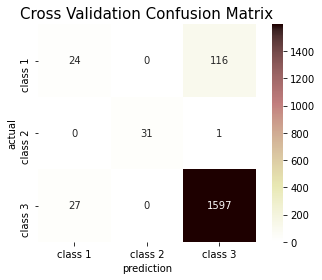

In [83]:
# confusion matrix for crossval
y_pred_de = cross_val_predict(Decision_Tree, X = svdMatrix, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred_de)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['class 1','class 2' ,'class 3'],
           yticklabels = ['class 1','class 2' ,'class 3'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [84]:
f1_de = metrics.f1_score(y_train, y_pred_de,average='macro')
print("Cross Validation f1 : {:6.2f}%".format(100*f1_de))
re_de = metrics.recall_score(y_train, y_pred_de,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*re_de))
pr_de = metrics.precision_score(y_train, y_pred_de,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*pr_de))

Cross Validation f1 :  73.08%
Cross Validation recall score:  70.79%
Cross Validation recall score:  80.08%


# Test set 

In [195]:
print("Test set: {:6.2f}%".format(100*Decision_Tree.score(svdMatrix_test, y_test)))

Test set:  77.28%


# class weight

In [85]:
Decision_Tree1 = DecisionTreeClassifier(class_weight= {2: 1 , 1 :11, 0 :50})
scores = cross_val_score(Decision_Tree1,svdMatrix, y_train, cv=5, scoring='f1')
print("The score for Decision Tree is")
Decision_Tree1.fit(svdMatrix, y_train)
print("Training: {:6.2f}%".format(100*Decision_Tree1.score(svdMatrix, y_train)))

The score for Decision Tree is
Training: 100.00%


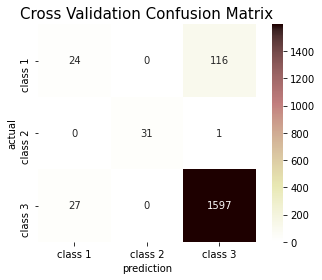

In [86]:
# confusion matrix for crossval
y_pred_de_w = cross_val_predict(Decision_Tree1, X = svdMatrix, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred_de)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['class 1','class 2' ,'class 3'],
           yticklabels = ['class 1','class 2' ,'class 3'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [87]:
f1_de = metrics.f1_score(y_train, y_pred_de_w,average='macro')
print("Cross Validation f1 : {:6.2f}%".format(100*f1_de))
re_de = metrics.recall_score(y_train, y_pred_de_w,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*re_de))
pr_de = metrics.precision_score(y_train, y_pred_de_w,average='macro')
print("Cross Validation precision score: {:6.2f}%".format(100*pr_de))

Cross Validation f1 :  77.54%
Cross Validation recall score:  76.66%
Cross Validation precision score:  78.46%


# Test set 

In [196]:
print("Test set: {:6.2f}%".format(100*Decision_Tree.score(svdMatrix_test, y_test)))

Test set:  77.28%


# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegressionCV
print("The score for Logistic Regression is")
clf = LogisticRegressionCV(cv=5, random_state=0).fit(svdMatrix, y_train)
print("Training: {:6.2f}%".format(100*clf.score(svdMatrix, y_train)))

The score for Logistic Regression is
Training:  97.72%


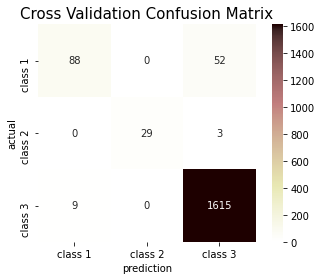

In [90]:
# confusion matrix for crossval
y_pred = cross_val_predict(clf, X = svdMatrix, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['class 1','class 2' ,'class 3'],
           yticklabels = ['class 1','class 2' ,'class 3'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [91]:
f1 = metrics.f1_score(y_train, y_pred,average='macro')
print("Cross Validation f1 Matrix: {:6.2f}%".format(100*f1))
re = metrics.recall_score(y_train, y_pred,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*re))
pr = metrics.precision_score(y_train, y_pred,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*pr))

Cross Validation f1 Matrix:  89.13%
Cross Validation recall score:  84.31%
Cross Validation recall score:  95.81%


# Test set 

In [197]:
print("Test set: {:6.2f}%".format(100*clf.score(svdMatrix_test, y_test)))

Test set:  88.20%


# class weight

In [92]:
from sklearn.linear_model import LogisticRegressionCV
print("The score for Logistic Regression is")
clf_w = LogisticRegressionCV(cv=5, random_state=0,class_weight= {2: 1 , 1 :11, 0 :50},solver='liblinear').fit(svdMatrix, y_train)
print("Training: {:6.2f}%".format(100*clf_w.score(svdMatrix, y_train)))

The score for Logistic Regression is
Training:  96.60%


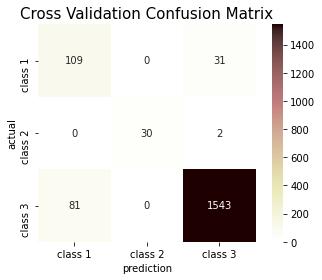

In [93]:
# confusion matrix for crossval
y_pred_l_w = cross_val_predict(clf_w, X = svdMatrix, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred_l_w)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['class 1','class 2' ,'class 3'],
           yticklabels = ['class 1','class 2' ,'class 3'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [94]:
f1 = metrics.f1_score(y_train, y_pred_l_w,average='macro')
print("Cross Validation f1 Matrix: {:6.2f}%".format(100*f1))
re = metrics.recall_score(y_train, y_pred_l_w,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*re))
pr = metrics.precision_score(y_train, y_pred_l_w,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*pr))

Cross Validation f1 Matrix:  86.42%
Cross Validation recall score:  88.87%
Cross Validation recall score:  85.09%


# Test set 

In [198]:
print("Test set: {:6.2f}%".format(100*clf_w.score(svdMatrix_test, y_test)))

Test set:  79.73%


# Gradient Boosting Classifier

In [96]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05)
gbc.fit(svdMatrix, y_train)
accuracies = cross_val_score(estimator = gbc, X = svdMatrix, y = y_train, cv = 5, scoring='f1')
print("Training: {:6.2f}%".format(100*gbc.score(svdMatrix, y_train)))

Training:  98.22%


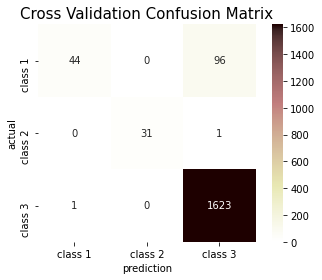

In [97]:
# confusion matrix for crossval
y_pred_gr = cross_val_predict(gbc, X = svdMatrix, y = y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred_gr)
sns.heatmap(conf_mat , cmap = 'pink_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['class 1','class 2' ,'class 3'],
           yticklabels = ['class 1','class 2' ,'class 3'])
plt.title('Cross Validation Confusion Matrix',fontsize = 15)
plt.xlabel('prediction')
plt.ylabel('actual');

In [98]:
f1_gr = metrics.f1_score(y_train, y_pred,average='macro')
print("Cross Validation f1 Matrix: {:6.2f}%".format(100*f1_gr))
re_gr = metrics.recall_score(y_train, y_pred,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*re_gr))
pr_gr = metrics.precision_score(y_train, y_pred,average='macro')
print("Cross Validation recall score: {:6.2f}%".format(100*pr_gr))

Cross Validation f1 Matrix:  89.13%
Cross Validation recall score:  84.31%
Cross Validation recall score:  95.81%


# Test set

In [199]:
print("Test set: {:6.2f}%".format(100*gbc.score(svdMatrix_test, y_test)))

Test set:  81.07%


# Unsupervised learning

# TF/IFD

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer(min_df=3,max_df=0.9)
X_tf = cv_tfidf.fit_transform(X)
X_tf

<2245x23451 sparse matrix of type '<class 'numpy.float64'>'
	with 884966 stored elements in Compressed Sparse Row format>

# SVD

In [101]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 100)
svdMatrix1 = svd.fit_transform(X_tf)
svdMatrix1

array([[ 3.75359587e-01, -1.05053957e-02, -8.51626097e-02, ...,
        -6.44037277e-02,  6.68350208e-02,  2.35685990e-05],
       [ 2.74925406e-01, -1.09265461e-01, -9.83439538e-02, ...,
         2.54059037e-02,  2.41065715e-02, -4.26847298e-02],
       [ 1.46755473e-01,  1.78037422e-01, -6.32163474e-02, ...,
         3.13741355e-02, -7.37815520e-04, -2.84744425e-02],
       ...,
       [ 2.43031126e-01,  3.77569267e-02,  5.21702662e-02, ...,
        -4.79334515e-03, -5.31811773e-02, -1.92732446e-02],
       [ 2.56480801e-01, -1.10913390e-01, -1.01682567e-01, ...,
         2.39177331e-02,  2.30008536e-02, -4.24898542e-02],
       [ 2.71539148e-01,  7.88223950e-02,  2.13989255e-01, ...,
        -2.27710572e-02, -2.88227913e-02, -1.03841335e-04]])

# KMeans

In [102]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters = 3,n_init=1000)
cls.fit(svdMatrix1)
cls.inertia_
x_clusterd = cls.fit_predict(svdMatrix)

In [103]:
cl = pd.DataFrame(np.array(x_clusterd).T)

In [104]:
cluster__ = {"judgment_text": X_train,
        "court_y": y_train,
        #"cluster": cl
          }

In [105]:
cluster_frame1 = pd.concat(cluster__, axis=1)

In [106]:
pd.concat([cluster_frame1.reset_index(drop=True), cl], axis=1)

,judgment_text,court_y,0
0,حمد اما فلدي التجاريه السادسه وبناء المقامه اد...,2,1
1,حمد اما فلدي التجاريه الثالثه وبناء المقامه غا...,0,0
2,حمد اما فلدي التجاريه الاولي وبناء المقامه شرك...,2,0
3,حمد اما فلدي التجاريه الخامسه وبناء المقامه سا...,2,1
4,حمد اما فلدي التجاريه الثالثه وبناء المقامه عا...,2,1
...,...,...,...
1791,حمد اما فلدي التجاريه الخامسه وبناء المقامه شر...,2,0
1792,حمد اما فلدي التجاريه الواحد والعشرون وبناء ال...,2,1
1793,حمد اما فلدي التجاريه الاولي وبناء المقامه عبد...,2,1
1794,حمد اما فلدي التجاريه السابعه وبناء المقامه جم...,2,1


In [107]:
from wordcloud import WordCloud

In [108]:
data['court_y'].value_counts()

2    2034
0     172
1      39
Name: court_y, dtype: int64

In [109]:
class_0 = data.loc[data['court_y']==0]
class_1 = data.loc[data['court_y']==1]
class_2 = data.loc[data['court_y']==2]

In [110]:
class_0_string = class_0['judgment_text'].str.cat(sep=' ')
class_1_string = class_1['judgment_text'].str.cat(sep=' ')
class_2_string = class_2['judgment_text'].str.cat(sep=' ')

In [111]:
# plt.figure(figsize=(10,6))
# plt.scatter(x=X_train, y=y_train, c=x_clusterd)

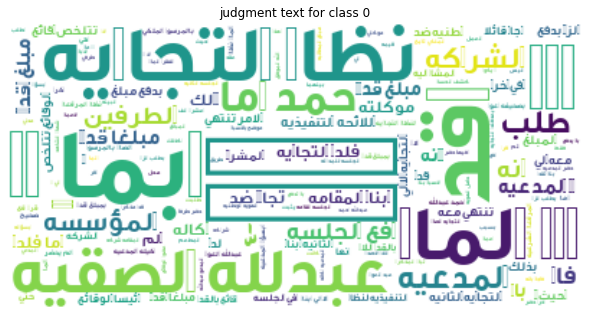

In [112]:
text = arabic_reshaper.reshape(class_0_string)
arabicstop = get_stop_words('arabic')
stopwords1 = set(stopwords)
wc = WordCloud(stopwords=stopwords1,max_font_size=200, background_color="white",font_path='ge-dinarone-bold_8.ttf')
text = arabic_reshaper.reshape(text)
text = get_display(text)
wc.generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("judgment text for class 0");
plt.tight_layout(pad=0)
plt.show()

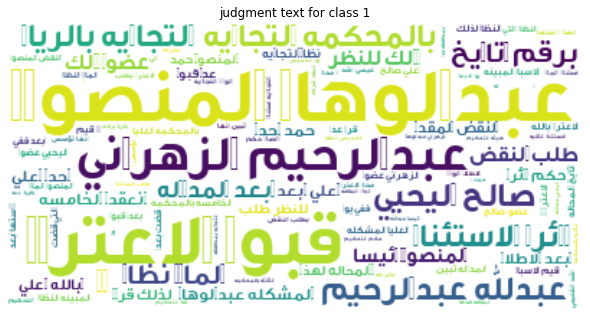

In [113]:
text1 = arabic_reshaper.reshape(class_1_string)
arabicstop = get_stop_words('arabic')
stopwords1 = set(arabicstop)
wc = WordCloud(stopwords=stopwords1,max_font_size=200, background_color="white",font_path='ge-dinarone-bold_8.ttf')
text1 = arabic_reshaper.reshape(text1)
text1 = get_display(text1)
wc.generate(text1)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("judgment text for class 1");
plt.tight_layout(pad=0)
plt.show()

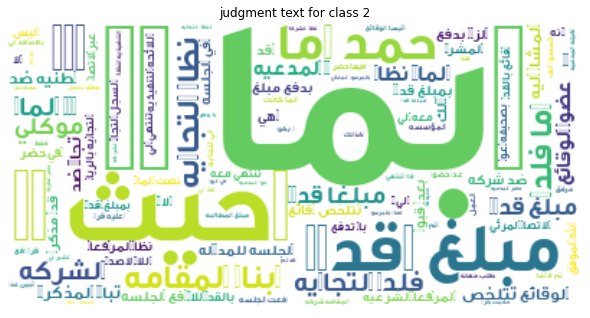

In [114]:
text2 = arabic_reshaper.reshape(class_2_string)
arabicstop = get_stop_words('arabic')
stopwords1 = set(arabicstop)
wc = WordCloud(stopwords=stopwords1,max_font_size=200, background_color="white",font_path='ge-dinarone-bold_8.ttf')
text2 = arabic_reshaper.reshape(text2)
text2 = get_display(text2)
wc.generate(text2)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("judgment text for class 2");
plt.tight_layout(pad=0)
plt.show()

# Text similarity

In [115]:
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

similarities =cosine_similarity(svdMatrix1[1:2,:],svdMatrix1) 
similarities

array([[0.18632313, 1.        , 0.02965047, ..., 0.05317885, 0.99867861,
        0.12563825]])

In [116]:
len(similarities[0])

2245

In [117]:
(similarities[0])[-5:]

array([0.23643249, 0.0805357 , 0.05317885, 0.99867861, 0.12563825])

In [118]:
indes = np.argsort(similarities[0])[-5:]

In [120]:
((similarities[0])[-5:])*100

array([23.64324947,  8.05356966,  5.31788453, 99.8678614 , 12.56382477])

In [121]:
index = np.argsort(similarities[0])[-5:]

In [ ]:
index

In [122]:
value = ((similarities[0][index])[-5:]) 
value

array([0.59980766, 0.99867861, 0.99867861, 0.99979798, 1.        ])

In [123]:
#value.reverse()
result=list(reversed(value))

In [124]:
result

[1.0,
 0.9997979825868075,
 0.998678613980637,
 0.9986786139806367,
 0.5998076611241672]

In [125]:
ma = zip (data.judgment_text.iloc[index],value *100)

In [126]:
for l, i in zip(result, index):
        print(data.judgment_text_1.iloc[i])
        print("------------")
    
        print(l *100)
        print("------------")

الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:
فلدى الدائرة التجارية الثانية وبناءً على القضية رقم  ٣٤٠ لعام ١٤٤٢ هـ

المقامة من/ فرع شركة البركه للتجارة سجل تجاري (...)
ضد/ شركة محمد عبدالرحمن الصالحي شركة ذات مسؤلية محدودة غير ذلك (...)

القاضي عبدالرحمن بن فايز الفايز رئيسا

(الوقائع) 
توجز بأن المدعية تقدمت للمحكمة بصحيفة دعوى قيدت قضية وأحيلت لهذه الدائرة التي باشرت نظرها في جلسة هذا اليوم وفيها حضر وكيل المدعية محمد الغامدي بموجب الوكالة رقم٤٢٣٠٠٦٧٤٠ كما تبين عدم حضور من يمثل المدعى عليها رغم تبلغها بموجب محضر التبليغ الإلكتروني بالرسائل النصية ، وبسؤال وكيل المدعية عن دعواه أحال على صحيفة الدعوى والتي يطلب فيها إلزام المدعى عليها بأن تدفع للمدعية مبلغاً قدره (١٨٢.١٦٠) مئة وأثنان وثمانون الف ومئة وستون ريال وذلك يمثل قيمة ملابس جاهزة تم توريدها لمحلات المدعى عليها ولم تسدد ما ثبت في ذمتها ، وبسؤاله عن بينته طلب أجلا لحصرها وهي فواتير وسند استلام بضائع وطلب أجلاً لتقديمها ، ثم رأت الدائرة صلاحية الدعوى للبت فيها .

(الأسباب) 
بناء على ما تقدم ، ولأن وكيل المدعية طلب أجلا لحصر بينات

In [ ]:
value

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 0 to 2394
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   F1               1921 non-null   object 
 1   court            2245 non-null   object 
 2   city             2218 non-null   object 
 3   court_id         2245 non-null   object 
 4   court_date       2245 non-null   object 
 5   appeal_court     1446 non-null   object 
 6   region           1419 non-null   object 
 7   appeal_id        1446 non-null   object 
 8   appeal_date      1419 non-null   object 
 9   judgment_text    2245 non-null   object 
 10  appeal_text      1419 non-null   object 
 11  Unnamed: 0.1     324 non-null    float64
 12  links            324 non-null    object 
 13  appeal_data      27 non-null     object 
 14  appleal_text     27 non-null     object 
 15  judgment_text_1  2245 non-null   object 
 16  Verdict          2245 non-null   object 
 17  incident      

# EDA

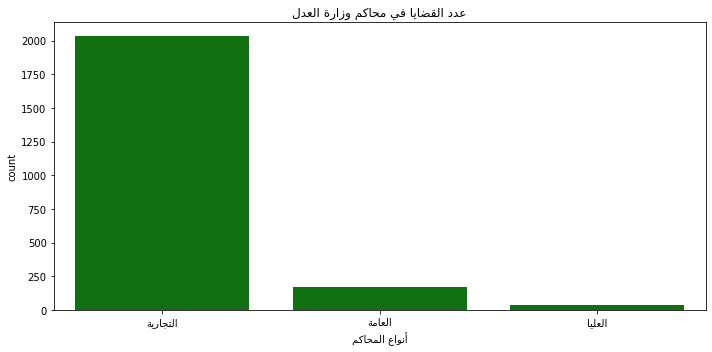

In [127]:
zlbl= get_display( arabic_reshaper.reshape('عدد القضايا في محاكم وزارة العدل'))
plt.figure(figsize=(10,5))
plt.title(zlbl)
df_tuple =list(zip(data['court']))
first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple]
xlbl = get_display( arabic_reshaper.reshape(' أنواع المحاكم '))
sns.countplot(x=first_columns, data=data, color='green');
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.tight_layout()
plt.show()

In [140]:
data.city.value_counts()

المدينه: الرياض             1080
المدينه: الدمام              423
المدينه: جدة                 294
المدينه: المدينة المنورة      99
الرياض                        80
المدينه: بريدة                60
المدينه: جازان                43
المدينه: أبها                 33
المدينه: تبوك                 24
المدينه: سكاكا                14
المدينه: مكة المكرمة          13
المدينه: حائل                 11
المدينه: عرعر                 11
المدينه: الباحة               10
المدينة المنورة                7
الدمام                         6
المدينه: نجران                 5
بريدة                          5
Name: city, dtype: int64

In [149]:
data['city'] =data['city'].str.replace('المدينه: الرياض', 'الرياض')
data['city'] =data['city'].str.replace('المدينه: الدمام', 'الدمام')
data['city'] =data['city'].str.replace('المدينه: جدة', 'جدة')
data['city'] =data['city'].str.replace('المدينه: بريدة', 'بريدة')
data['city'] =data['city'].str.replace('المدينه: جازان', 'جازان')
data['city'] =data['city'].str.replace('المدينه: أبها', 'أبها')
data['city'] =data['city'].str.replace('المدينه: تبوك', 'تبوك')
data['city'] =data['city'].str.replace('المدينه: سكاكا', 'سكاكا')
data['city'] =data['city'].str.replace('المدينه: مكة المكرمة', 'مكة المكرمة')
data['city'] =data['city'].str.replace('المدينه: حائل', 'حائل')
data['city'] =data['city'].str.replace('المدينه: عرعر', 'عرعر')
data['city'] =data['city'].str.replace('المدينه: الباحة', 'الباحة')
data['city'] =data['city'].str.replace('المدينه: نجران', 'نجران')
data['city'] =data['city'].str.replace('المدينه: المدينة المنورة', 'المدينة المنورة')

In [159]:
top_manufacturers.values


array([1160,  429,  294,  106,   65,   43,   33,   27,   24,   14,   13,
         11,   11,   10,    5])

In [184]:
top_manufacturers

الرياض             1160
الدمام              429
جدة                 294
المدينة المنورة     106
بريدة                65
جازان                43
أبها                 33
تبوك                 24
سكاكا                14
مكة المكرمة          13
حائل                 11
عرعر                 11
الباحة               10
نجران                 5
Name: city, dtype: int64

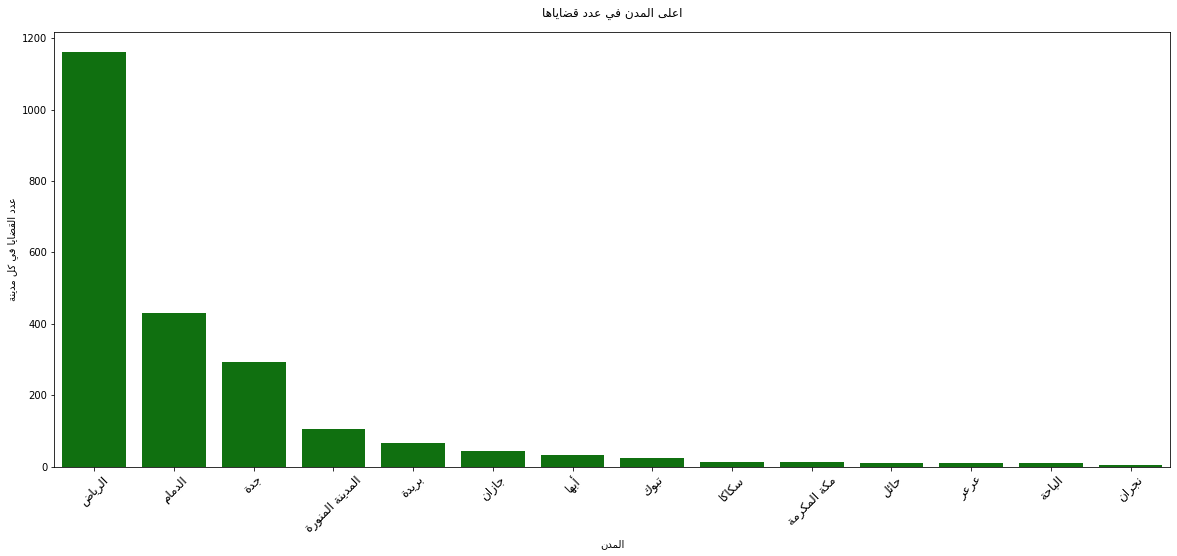

In [188]:
top_manufacturers = data.city.value_counts(dropna=True).iloc[:20]
df_tuple =list(zip(top_manufacturers.index))
first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple]
zlbl= get_display( arabic_reshaper.reshape('عدد القضايا في كل مدينة'))
zlbl1= get_display( arabic_reshaper.reshape('اعلى المدن في عدد قضاياها'))
zlbl2= get_display( arabic_reshaper.reshape('المدن'))
plt.figure(figsize=(20,8))
sns.barplot(x=first_columns,y=top_manufacturers.values, color='green')
plt.xticks(fontsize=12,rotation=45) 
plt.xlabel(zlbl2)
plt.ylabel(zlbl)
plt.title(zlbl1,y=1.02);

In [201]:
data.to_csv('data_clean')